In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from urllib.parse import urlparse
from tld import get_tld
import os.path
from googlesearch import search

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
from lightgbm import LGBMClassifier

In [55]:
df = pd.read_csv('malicious_phish.csv')

In [3]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
df['url']

0                                          br-icloud.com.br
1                       mp3raid.com/music/krizz_kaliko.html
2                           bopsecrets.org/rexroth/cr/1.htm
3         http://www.garage-pirenne.be/index.php?option=...
4         http://adventure-nicaragua.net/index.php?optio...
                                ...                        
651186              xbox360.ign.com/objects/850/850402.html
651187         games.teamxbox.com/xbox-360/1860/Dead-Space/
651188           www.gamespot.com/xbox360/action/deadspace/
651189        en.wikipedia.org/wiki/Dead_Space_(video_game)
651190            www.angelfire.com/goth/devilmaycrytonite/
Name: url, Length: 651191, dtype: object

In [5]:
df['type']

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object

In [6]:
df.shape

(651191, 2)

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
651186    False
651187    False
651188    False
651189    False
651190    False
Length: 651191, dtype: bool

In [8]:
df.shape

(651191, 2)

In [9]:
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

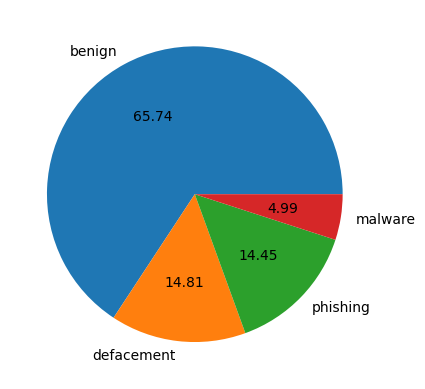

In [10]:
plt.pie(df['type'].value_counts(),labels=['benign','defacement','phishing','malware'],autopct="%0.2f")
plt.show()

In [11]:
df_phishing = df[df.type=="phishing"]
df_benign = df[df.type=="benign"]
df_defacement = df[df.type=="defacement"]
df_malware = df[df.type=="malware"]

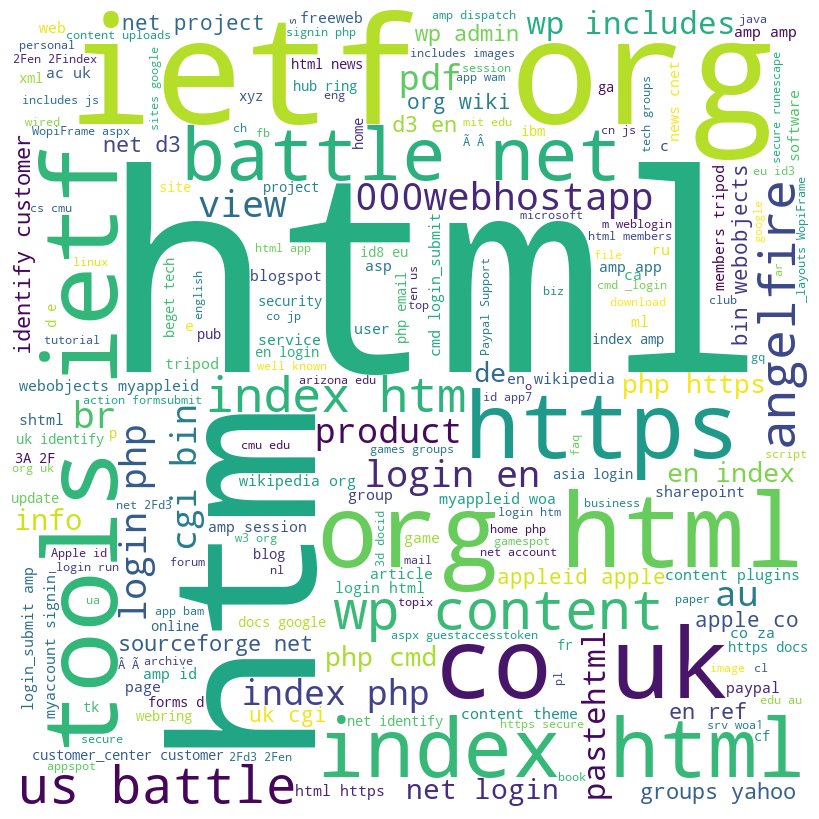

In [12]:
phishing_url = " ".join(i for i in df_phishing.url)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(phishing_url)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

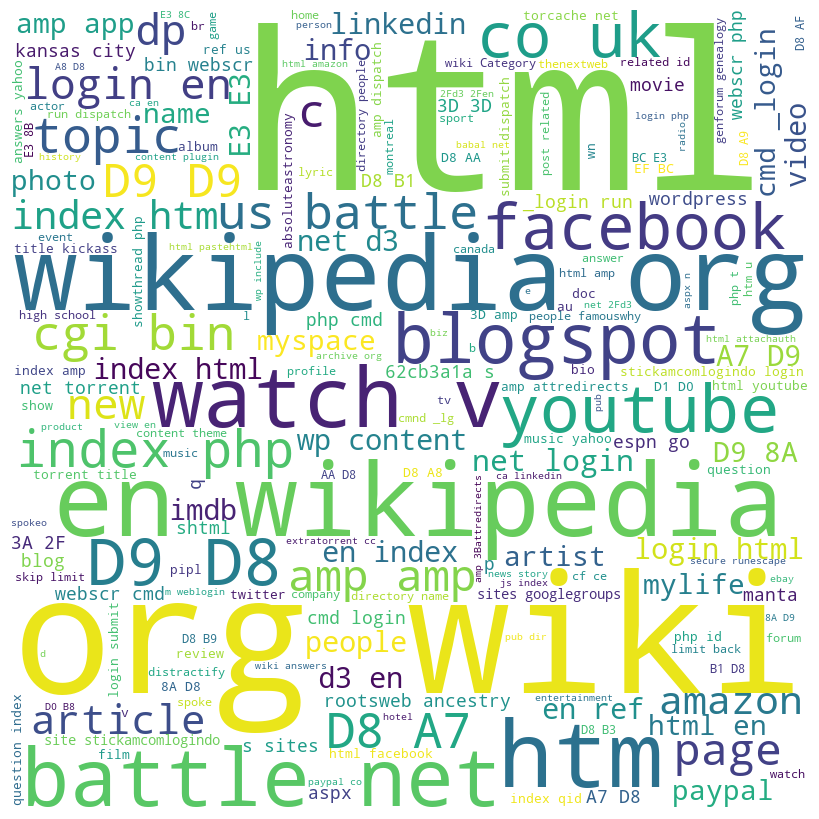

In [28]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(benign_url)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

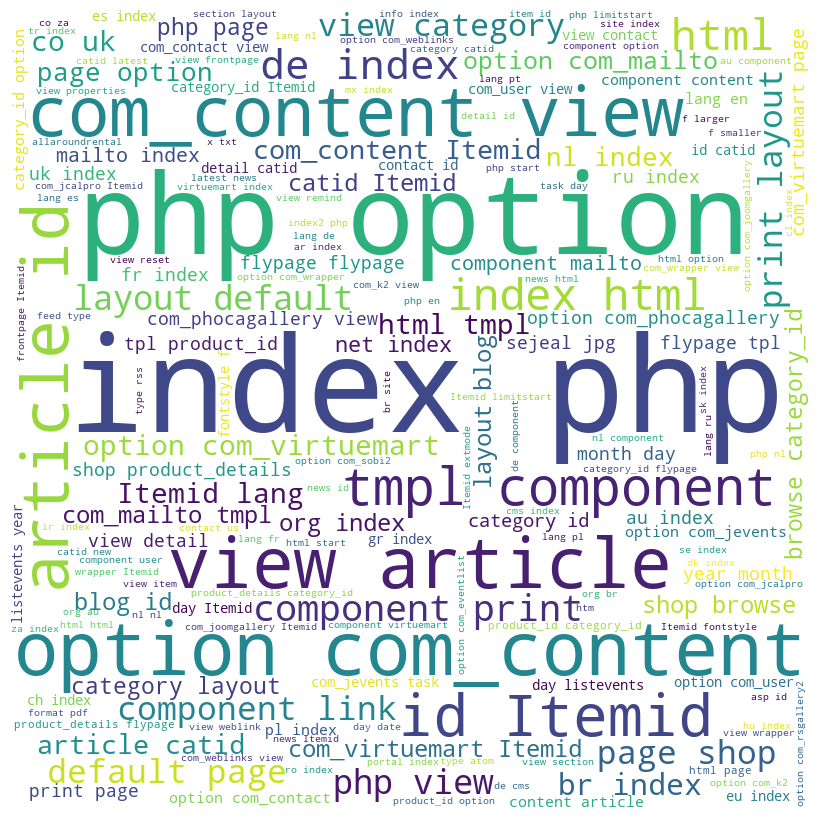

In [29]:
url = " ".join(i for i in df_defacement.url)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(url)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

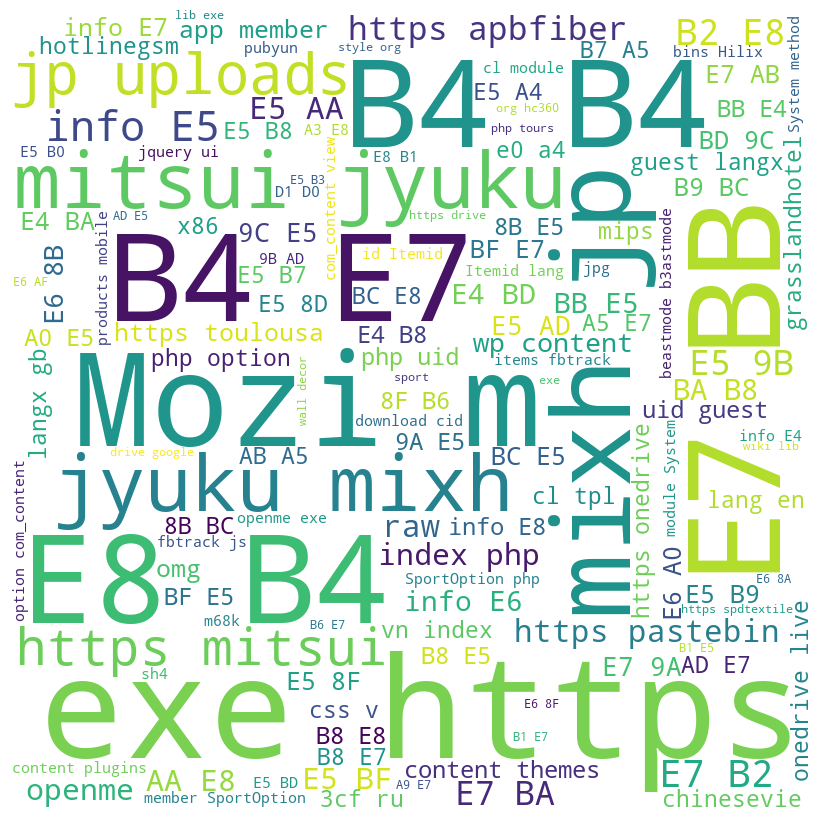

In [30]:

url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(url)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

FEATURE SELECTION

In [56]:

def find_ip_add(url):
  match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
  if match:
    return 1
  else:
    return 0

df['url_ip_add'] = df['url'].apply(lambda i : find_ip_add(i))
    

In [57]:

def check_hostname(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname,url)
    if match:
        return 1
    else:
        return 0

df['normal_url'] = df['url'].apply(lambda i: check_hostname(i))

    

In [58]:

def google_index(url):
    site = search(url,5)
    if site:
        return 1
    else:
        return 0

df['google-index'] = df['url'].apply(lambda i: google_index(i))



In [59]:
def count_dot(url):
   return url.count('.')
df['count_dot'] = df['url'].apply(lambda i: count_dot(i))


In [60]:
def count_www(url):
    return url.count('www')
df['count_www'] = df['url'].apply(lambda i: count_www(i))



In [61]:
def count_at_the(url):
    return url.count('@')

df['count_@'] = df['url'].apply(lambda i: count_at_the(i))



In [62]:
def count_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: count_dir(i))



In [63]:
def count_domain(url):
   urldir = urlparse(url).path
   return urldir.count('//')

df['count_domain'] = df['url'].apply(lambda i: count_domain(i))



In [64]:
def count_http(url):
    return url.count('http')

df['count_http'] = df['url'].apply(lambda i: count_http(i))



In [65]:
def count_https(url):
    return url.count('https')

df['count_https'] = df['url'].apply(lambda i: count_https(i))

In [66]:
def count_que(url):
    return url.count('?')

df['count_?'] = df['url'].apply(lambda i:count_que(i))



In [67]:
def count_per(url):
    return url.count('%')

df['count_%'] = df['url'].apply(lambda i: count_per(i))

In [68]:
def count_minus(url):
    return url.count('-')

df['count_hythen'] = df['url'].apply(lambda i: count_minus(i))



In [69]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [70]:
def count_plus(url):
    return url.count('+')

df['count+'] = df['url'].apply(lambda i: count_plus(i))

In [71]:
def count_len(url):
    return len(str(url))

df['length'] = df['url'].apply(lambda i:count_len(i))

In [72]:
def count_host_name(url):
    return len(urlparse(url).netloc)

df['hostname_len'] = df['url'].apply(lambda i: count_host_name(i))

In [73]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))



In [74]:
def supicious_words(url):
    match = re.search('paypal|login|singin|bank|account|update|credit|free|lucky|service|customercare|bonus|ebayisapi|webscr',url.lower())

    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: supicious_words(i))


In [75]:
def special_char(url):
    count = 0
    for i in url:
       if (i.isdigit() == False) and (i.isalpha() == False):
           count+=1
    return count       
           
df['no_special_char'] = df['url'].apply(lambda i:special_char(i))

In [76]:
def count_digit(url):
    count = 0

    for i in url:
        if(i.isdigit()):
            count+=1
    return count

df['count_digit'] = df['url'].apply(lambda i: count_digit(i))

In [77]:
def count_letter(url):
    count = 0

    for i in url:
        if(i.isalpha()):
            count+=1

    return count        

df['count_alpha'] = df['url'].apply(lambda i: count_letter(i))


In [78]:

def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
    

df['fd_length']  = df['url'].apply(lambda i: fd_length(i))




df['top_level_domain'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_len(tld):
    try:
      return len(tld)
    except:
      return 0
    
df['tld_length'] = df['top_level_domain'].apply(lambda i: tld_len(i))



In [79]:
df = df.drop("top_level_domain",1)

C:\Users\JASANI TASHMI\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [80]:
df.columns

Index(['url', 'type', 'url_ip_add', 'normal_url', 'google-index', 'count_dot',
       'count_www', 'count_@', 'count_dir', 'count_domain', 'count_http',
       'count_https', 'count_?', 'count_%', 'count_hythen', 'count=', 'count+',
       'length', 'hostname_len', 'short_url', 'sus_url', 'no_special_char',
       'count_digit', 'count_alpha', 'fd_length', 'tld_length'],
      dtype='object')

## Representation oF Feature

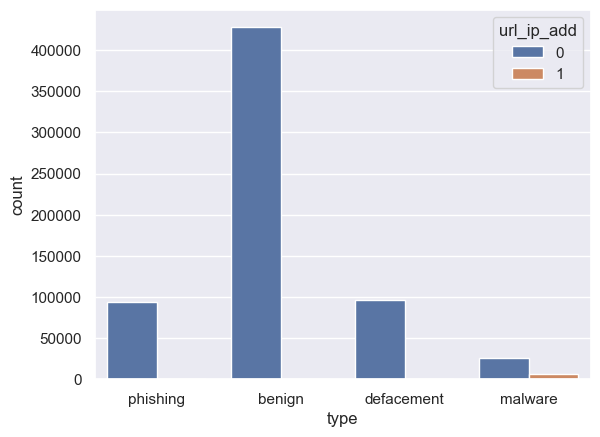

In [ ]:

sns.set(style="darkgrid")
ax=sns.countplot(x="type",data=df,hue="url_ip_add")

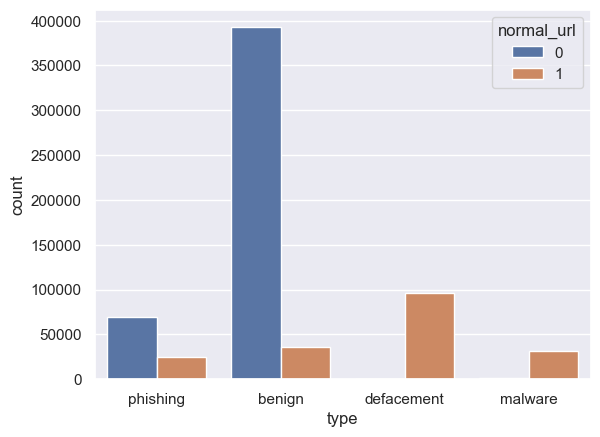

In [ ]:
sns.set(style="darkgrid")
ax=sns.countplot(x="type",data=df,hue="normal_url")

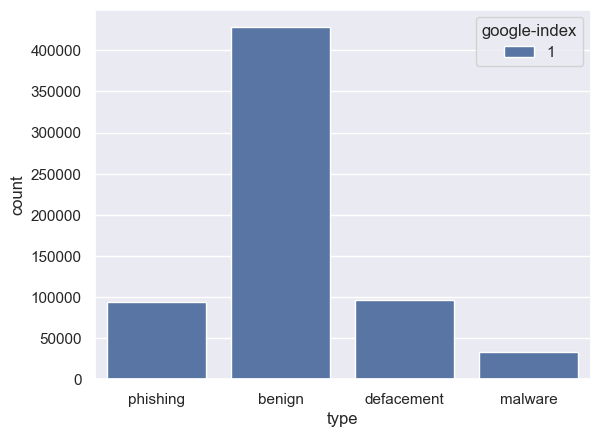

In [ ]:
sns.set(style="darkgrid")
ax=sns.countplot(x="type",data=df,hue="google-index")

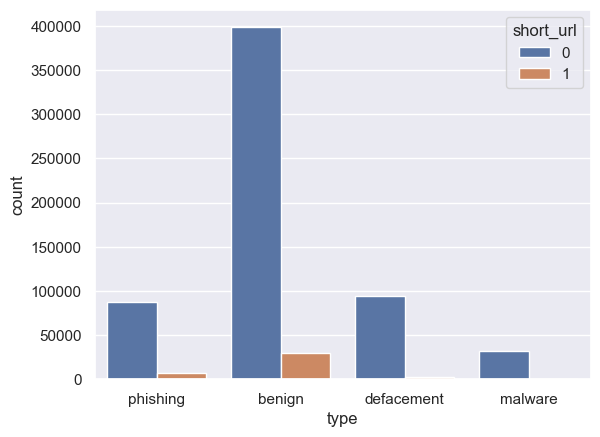

In [ ]:
sns.set(style="darkgrid")
ax=sns.countplot(x="type",data=df,hue="short_url")

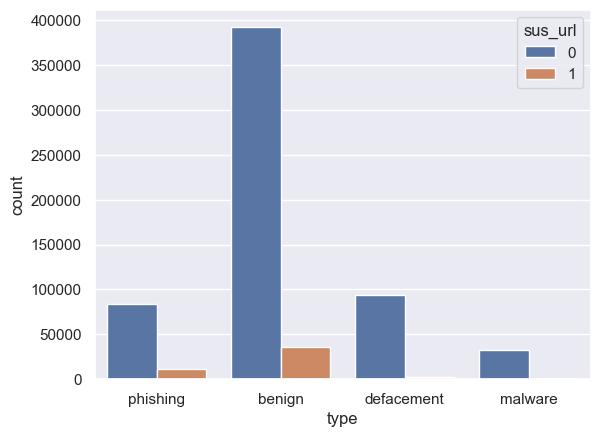

In [ ]:
sns.set(style="darkgrid")
ax=sns.countplot(x="type",data=df,hue="sus_url")

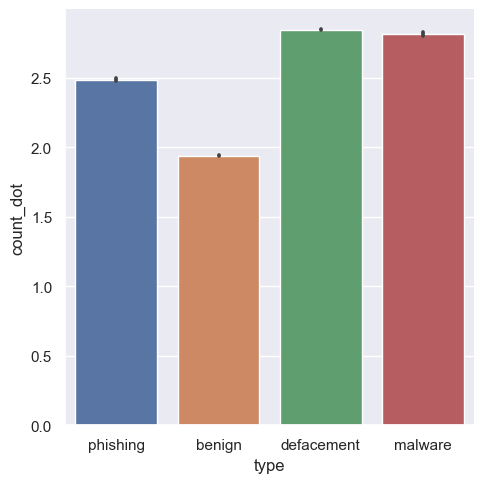

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_dot",kind="bar",data=df)

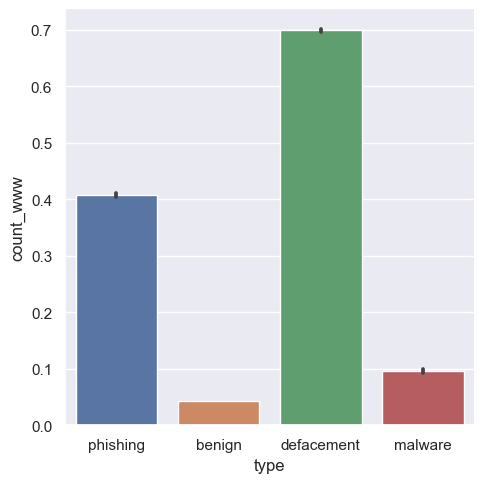

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_www",kind="bar",data=df)

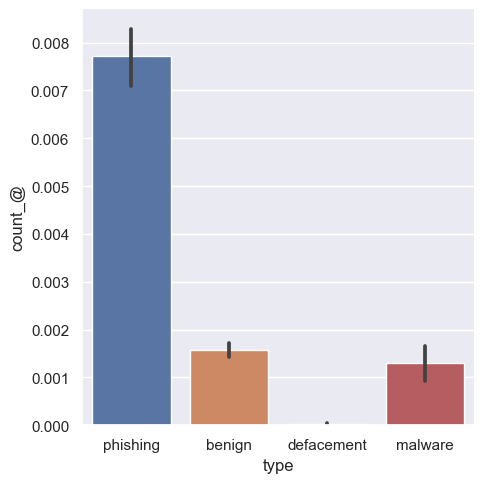

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_@",kind="bar",data=df)


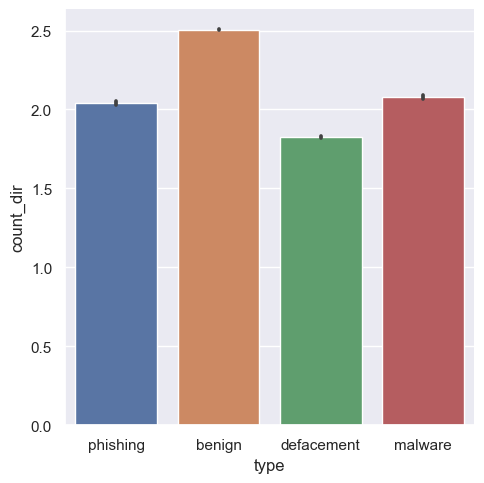

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_dir",kind="bar",data=df)


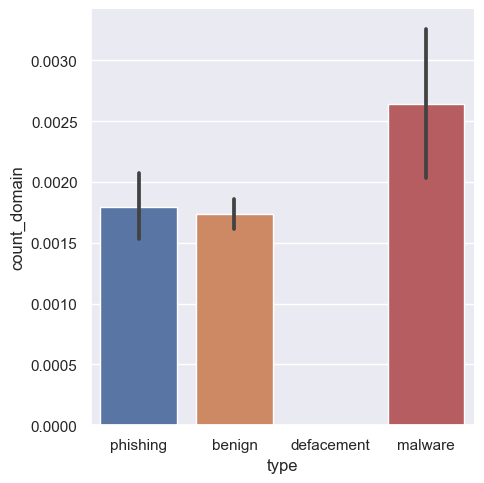

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_domain",kind="bar",data=df)


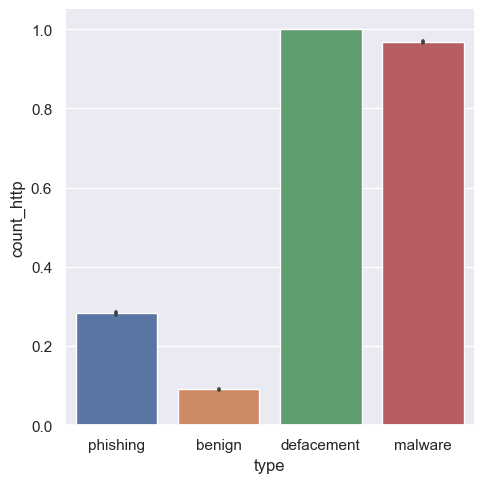

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_http",kind="bar",data=df)


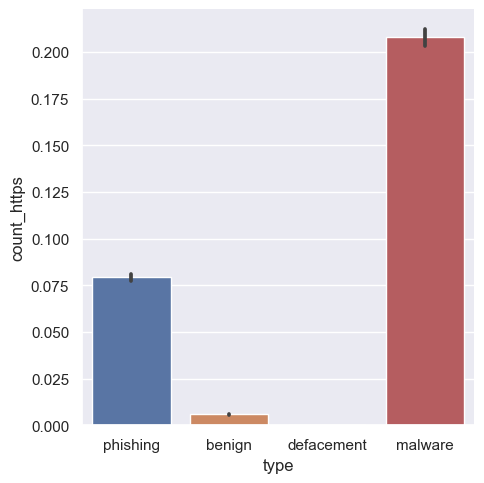

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="count_https",kind="bar",data=df)


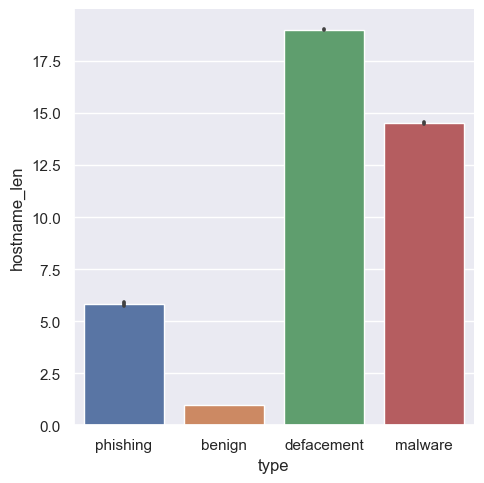

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="hostname_len",kind="bar",data=df)


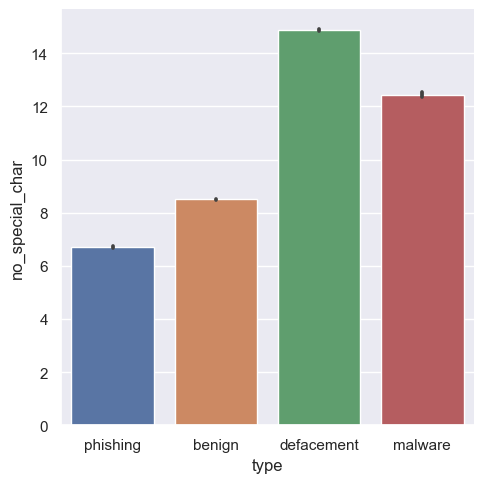

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="no_special_char",kind="bar",data=df)


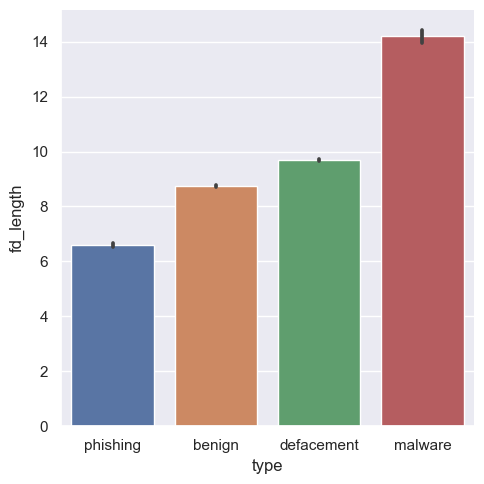

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="fd_length",kind="bar",data=df)


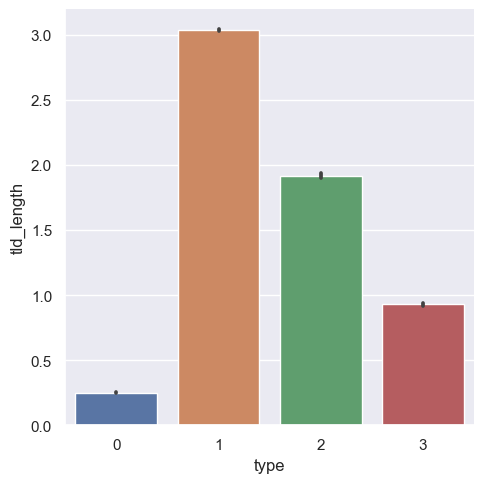

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="tld_length",kind="bar",data=df)


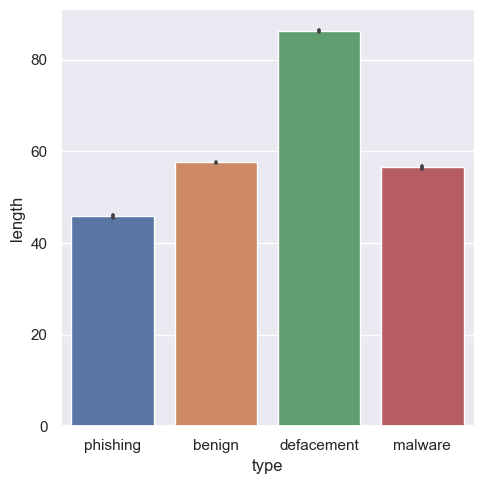

In [ ]:
sns.set(style="darkgrid")
ax=sns.catplot(x="type",y="length",kind="bar",data=df)


## Encoding

In [81]:
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])


## Selecting Feature

In [82]:
x = df[['url_ip_add', 'normal_url','count_dot',
       'count_www','count_@', 'count_dir', 'count_domain', 'count_http',
       'count_https', 'count_?', 'count_%', 'count_hythen', 'count=', 'count+',
       'length', 'hostname_len', 'short_url', 'sus_url', 'no_special_char',
       'count_digit', 'count_alpha', 'fd_length', 'tld_length']]
y = df['type']

## Train and Test Split

In [83]:

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,shuffle=True,random_state=20)

## Model Building

## 1. Random Forest Classifier

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['benign','defacement','phishing','malware']))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)


              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.98      0.99      0.99     19292
    phishing       0.99      0.95      0.97      6504
     malware       0.91      0.86      0.89     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.967


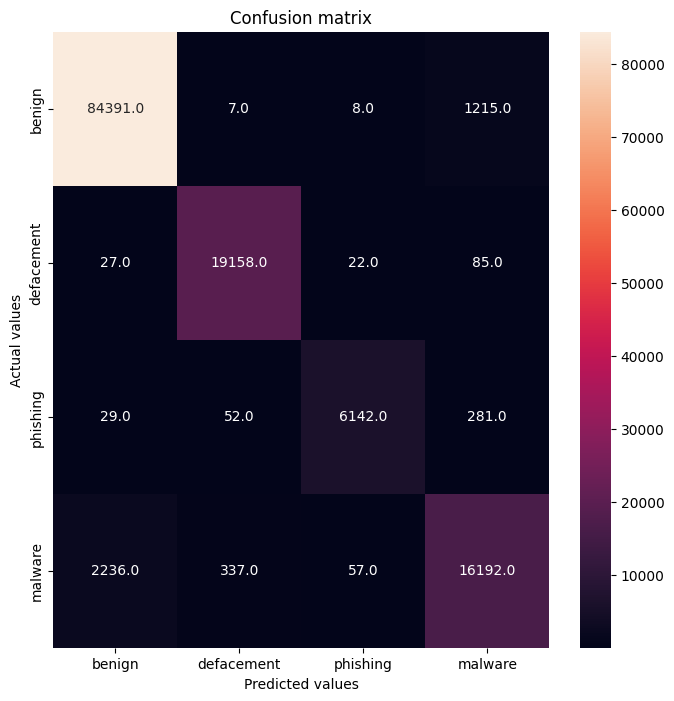

In [42]:
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=['benign','defacement','phishing','malware'],columns=['benign','defacement','phishing','malware'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df,annot=True,fmt=".1f")
plt.title("Confusion matrix")
plt.ylabel("Actual values")
plt.xlabel('Predicted values')
plt.show()

<AxesSubplot:>

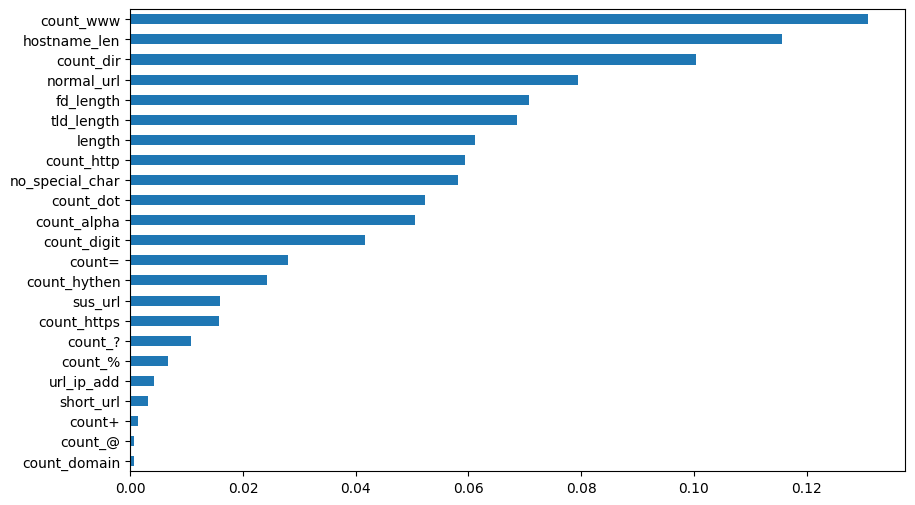

In [43]:
feat_importances = pd.Series(rf.feature_importances_,index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10,6))

## 2. Light GBM Classifier

In [ ]:

lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_pred = lgb.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['benign','defacement','phishing','malware']))
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1308
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 23
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.97      0.91      0.94      6504
     malware       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130

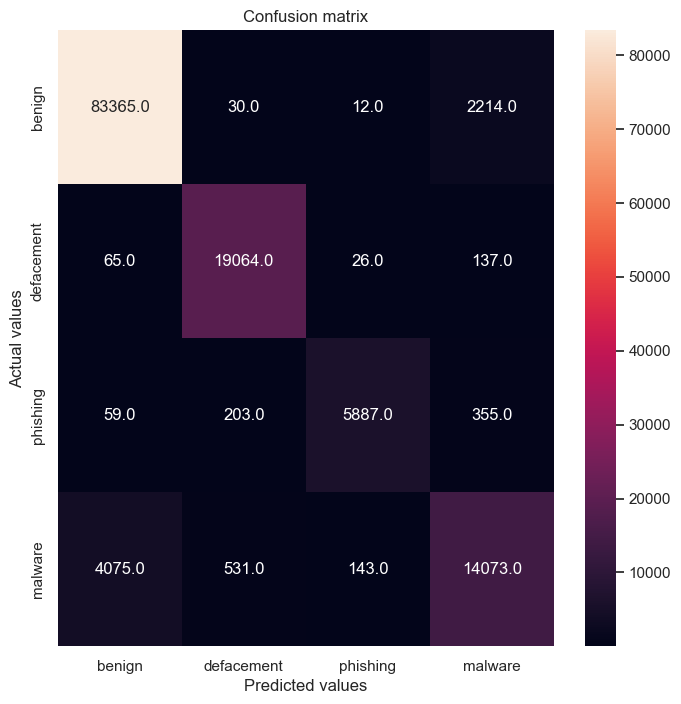

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=['benign','defacement','phishing','malware'],columns=['benign','defacement','phishing','malware'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df,annot=True,fmt=".1f")
plt.title("Confusion matrix")
plt.ylabel("Actual values")
plt.xlabel('Predicted values')
plt.show()

<AxesSubplot:>

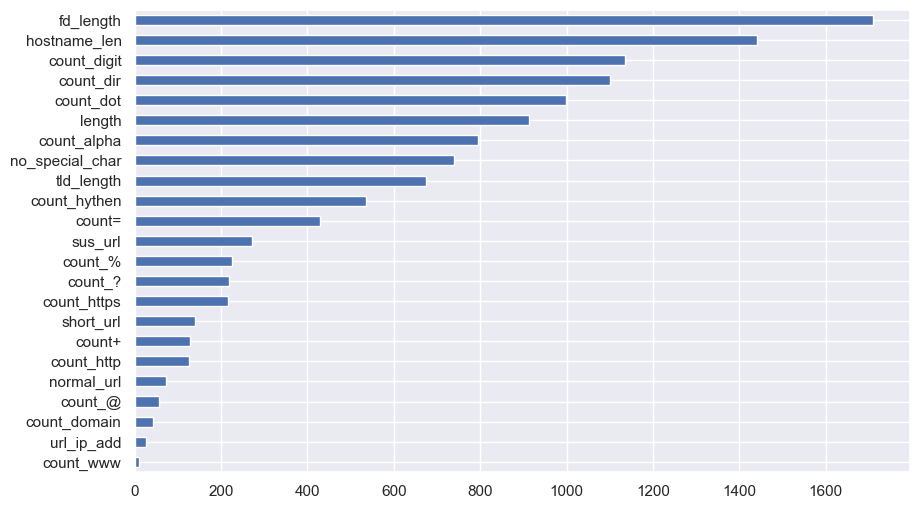

In [ ]:
feat_importances = pd.Series(lgb.feature_importances_,index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10,6))

## DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['benign','defacement','phishing','malware']))

Acc_score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % Acc_score)

              precision    recall  f1-score   support

      benign       0.96      0.96      0.96     85621
  defacement       0.97      0.98      0.98     19292
    phishing       0.95      0.94      0.95      6504
     malware       0.81      0.79      0.80     18822

    accuracy                           0.94    130239
   macro avg       0.92      0.92      0.92    130239
weighted avg       0.94      0.94      0.94    130239

accuracy:   0.940


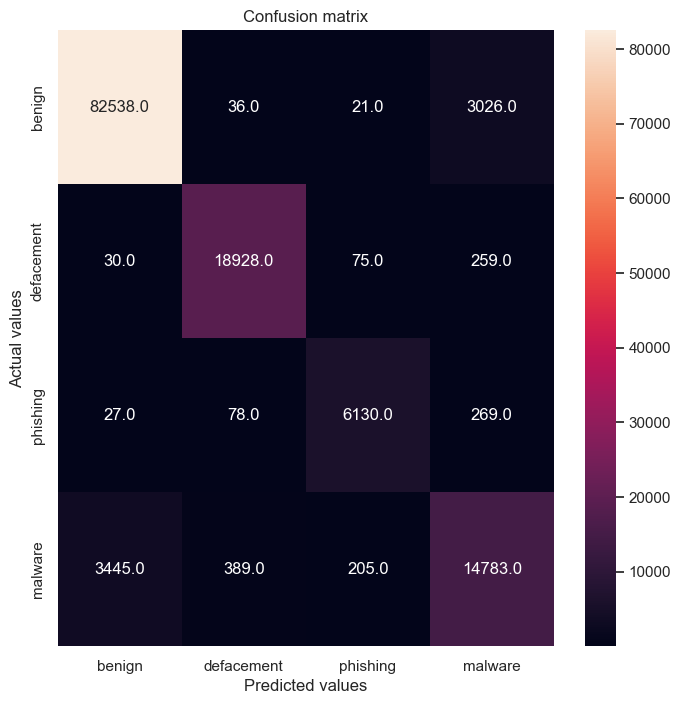

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=['benign','defacement','phishing','malware'],columns=['benign','defacement','phishing','malware'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df,annot=True,fmt=".1f")
plt.title("Confusion matrix")
plt.ylabel("Actual values")
plt.xlabel('Predicted values')
plt.show()

<AxesSubplot:>

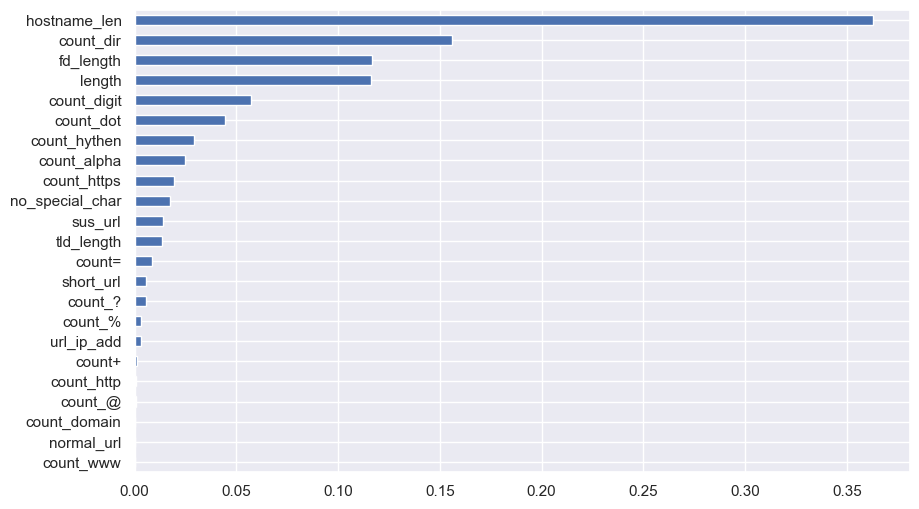

In [ ]:
feat_importances = pd.Series(dtc.feature_importances_,index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10,6))

In [ ]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()

In [ ]:
clfs = {
    'RF':rfc,
    'DT':dtc,
    'LR':lrc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    classification = classification_report(y_test,y_pred,target_names=['benign','defacement','phishing','malware'])
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy,classification

In [ ]:
train_classifier(rfc,x_train,y_train,x_test,y_test)

(0.9665921882078333,
 '              precision    recall  f1-score   support\n\n      benign       0.97      0.99      0.98     85621\n  defacement       0.98      0.99      0.99     19292\n    phishing       0.99      0.95      0.97      6504\n     malware       0.91      0.86      0.88     18822\n\n    accuracy                           0.97    130239\n   macro avg       0.96      0.95      0.95    130239\nweighted avg       0.97      0.97      0.97    130239\n')

In [ ]:
accuracy_scores = []
classification = {}

for name,clf in clfs.items():
    c_acc,classi = train_classifier(clf,x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",c_acc)
    print("classification report: ",classi)

    accuracy_scores.append(c_acc)
    classification[clf] = classi

For  RF
Accuracy -  0.9665921882078333
classification report:                precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.98      0.99      0.99     19292
    phishing       0.99      0.95      0.97      6504
     malware       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239

For  DT
Accuracy -  0.9574167492072267
classification report:                precision    recall  f1-score   support

      benign       0.97      0.98      0.97     85621
  defacement       0.98      0.98      0.98     19292
    phishing       0.95      0.95      0.95      6504
     malware       0.88      0.84      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.94      0.94      0.94    130239
weighted avg       0.96      0.96      0.96    130239

For 

## Main Function

In [85]:

def main(url):
    status = []
    status.append(find_ip_add(url))
    status.append(check_hostname(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_at_the(url))
    status.append(count_dir(url))
    status.append(count_domain(url))
    status.append(count_http(url))
    status.append(count_https(url))
    status.append(count_que(url))
    status.append(count_per(url))
    status.append(count_minus(url))
    status.append(count_equal(url))
    status.append(count_plus(url))
    status.append(count_len(url))
    status.append(count_host_name(url))
    status.append(shortening_service(url))
    status.append(supicious_words(url))
    status.append(special_char(url))
    status.append(count_digit(url))
    status.append(count_letter(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
    status.append(tld_len(tld))

    return status


In [86]:
def prediction(url):
    features = main(url)

    features = np.array(features).reshape((1,-1))
   
    pred = rf.predict(features)

    if int(pred[0]) == 0:
        return "safe"
    
    elif int(pred[0]) == 1.0:
        return "defacement"
    
    elif int(pred[0]) == 2.0:
        return "phishing"
    
    elif int(pred[0]) == 3.0:
        return "malware"



In [89]:
urls = ['https://www.google.com']
for url in urls:
    print(prediction(url))

malware


c:\Users\JASANI TASHMI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [90]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [92]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))